<a href="https://colab.research.google.com/github/its-curzon/CalFirstYear2ndYearKY/blob/main/CalFirstSecondPlayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Cal at Kentucky - Freshmen contributors who returned for their Sophomore years.



In [ ]:
import pandas as pd

db = pd.read_csv('12yCalSpreadsheet.csv')
db.head()

,Player,ID,Year,Pos,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,KYLE WHITJER,0,0,F,40,0,11.6,1.8,4.1,0.438,...,0.815,0.7,1.1,1.8,0.4,0.1,0.4,0.7,1.1,5.0
1,KYLE WHITJER,0,1,F,33,10,23.8,3.5,8.4,0.421,...,0.810,1.1,3.1,4.2,1.5,0.4,0.4,1.3,1.5,10.2
2,WILLIE CAULEY STIEIN,1,0,F,29,14,23.6,3.6,5.8,0.621,...,0.372,2.3,3.9,6.2,0.9,0.8,2.1,1.7,2.4,8.0
3,WILLIE CAULEY STIEIN,1,1,F,37,18,23.8,2.9,4.8,0.596,...,0.482,2.5,3.5,6.1,0.7,1.2,2.9,0.8,2.6,6.0
4,ALEX POYTHRESS,2,0,F,33,31,25.8,4.0,6.9,0.581,...,0.689,1.9,4.2,6.0,0.7,0.3,0.4,2.0,2.7,11.2


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  44 non-null     object 
 1   ID      44 non-null     int64  
 2   Year    44 non-null     int64  
 3   Pos     44 non-null     object 
 4   G       44 non-null     int64  
 5   GS      44 non-null     int64  
 6   MP      44 non-null     float64
 7   FG      44 non-null     float64
 8   FGA     44 non-null     float64
 9   FG%     44 non-null     float64
 10  3P      44 non-null     float64
 11  3PA     44 non-null     float64
 12  3P%     44 non-null     float64
 13  2P      44 non-null     float64
 14  2PA     44 non-null     float64
 15  2P%     44 non-null     float64
 16  eFG%    44 non-null     float64
 17  FT      44 non-null     float64
 18  FTA     44 non-null     float64
 19  FT%     44 non-null     float64
 20  ORB     44 non-null     float64
 21  DRB     44 non-null     float64
 22  TRB 

In [ ]:
#Let's look at the minutes average for first year players that returned for
#their second year.
#freshmen
average_mp_fresh = db[db['Year']==0]['MP'].mean()
#sophmores
average_mp_soph = db[db['Year']==1]['MP'].mean()
#and the average difference
diff_mp = average_mp_soph - average_mp_fresh

print(f"Average Minutes Per Game (Freshman): {average_mp_fresh:.2f}")
print(f"Average Minutes Per Game (Sophomore): {average_mp_soph:.2f}")
print(f"Average Difference per Player: {diff_mp:.2f}")

Average Minutes Per Game (Freshman): 18.28
Average Minutes Per Game (Sophomore): 20.92
Average Difference per Player: 2.64


<h2>Since Cal's first year, returning sophomores average 2.64 more minutes per game than their freshman season.


In [ ]:
import plotly.express as px

plot_db = pd.DataFrame({
    'Year': ['Year 0', 'Year 1'],
    'Average Minutes Per Game': [db[db['Year'] == 0]['MP'].mean(),
                                 db[db['Year'] == 1]['MP'].mean()]
})

plot_db['Year'] = plot_db['Year'].replace({'Year 0': 'Freshmen', 'Year 1': 'Sophomores'})

bar = px.bar(plot_db,
             x='Year',
             y='Average Minutes Per Game',
             title='Average Minutes per Game (First to Second Season)',
             labels={'Average Minutes Per Game': 'Minutes Per Game', 'Year 0': 'Freshman',
                     'Year 1': 'Sophomore'},
             color='Year',
             template='plotly_white')
bar.show()

<h2>Let's break it down by position.

In [ ]:
#lets group our data by position

avg_mp_y_p = db.groupby(['Pos', 'Year'])['MP'].mean().reset_index()

#then we will make a pivot table to find specifically the minutes played,
#position, and year

piv_mp = avg_mp_y_p.pivot(index='Pos', columns='Year', values='MP').reset_index()
#make the new columns

piv_mp.columns = ['Pos', 'Freshman MPG', 'Sophomore MPG']
#and add our MP difference column

piv_mp['MP Difference(Sophomore - Freshman)'] = piv_mp['Sophomore MPG'] - piv_mp['Freshman MPG']

print("Minutes Per Game by Position:")
print(piv_mp.to_markdown(index=False, numalign='left', stralign='left'))


Minutes Per Game by Position:
| Pos   | Freshman MPG   | Sophomore MPG   | MP Difference(Sophomore - Freshman)   |
|:------|:---------------|:----------------|:--------------------------------------|
| C     | 14.1           | 16.3            | 2.2                                   |
| F     | 14.3083        | 17.825          | 3.51667                               |
| G     | 24.0444        | 25.5667         | 1.52222                               |


<h2> Minutes per position - Forwards coming back see an average of a 3.5 minute increase.


In [ ]:
#Let's make a graph
avg_mp_by_pos_year = db.groupby(['Pos', 'Year'])['MP'].mean().reset_index()

melted_mp = avg_mp_by_pos_year.copy()
melted_mp['Year'] = melted_mp['Year'].replace({0:'Freshman', 1:'Sophomore'})

bar = px.bar(melted_mp,
             x='Pos',
             y= 'MP',
             color='Year',
             barmode='group',
             title='Average Minutes per Game by Position and Year',
             labels={'MP': 'Minutes Averaged', 'Pos': 'Position'},
             template='plotly_dark'
             )

bar.show()

<h2> Cal historically runs a guard heavy lineup. This is seen here especially in first year and returning guards.

<h2>As far as Forwards and Centers, they are roughly evenly distributed

<h2> Can we assume that this causes an increase in quantifyable offensive player value?
Let's look.

In [ ]:
#First let's group by Position and year, and calculate out Points, Assits, Total
#Rebounds, and Effective Field Goal Percentage (see Documentation)

avg_stats_by_pos_year = db.groupby(['Pos', 'Year'])[['PTS', 'AST', 'TRB', 'eFG%']].mean().reset_index()

#now, let's check out the table we made here
print("Average Points, Assists, Rebounds, and eFG% by Position and Year:")
print(avg_stats_by_pos_year.to_markdown(index=False, numalign='left', stralign="left"))

Average Points, Assists, Rebounds, and eFG% by Position and Year:
| Pos   | Year   | PTS     | AST      | TRB     | eFG%     |
|:------|:-------|:--------|:---------|:--------|:---------|
| C     | 0      | 5.2     | 0.3      | 3.9     | 0.569    |
| C     | 1      | 6.4     | 0.7      | 4.6     | 0.506    |
| F     | 0      | 4.9     | 0.45     | 3.45    | 0.523333 |
| F     | 1      | 5.95    | 0.691667 | 4.325   | 0.54575  |
| G     | 0      | 7.74444 | 2.38889  | 2.55556 | 0.479444 |
| G     | 1      | 10.5222 | 3.13333  | 3.2     | 0.477667 |


<h1>
All positions averaged an increased in scoring, assists, AND rebounding.

<h3> Centers and Guards, however, saw a dip in their effective Field Goal percentage.

<h3> While raw offensive production increased, only forwards increased their efficiency(2.2%). Centers and Guards(Small -.2%), despite playing more minutes and scoring more points, saw their efficiency decrease - Centers, over -6% on average from nearly 57% to 50%.

<h3> Were they taking on more challenging shots? More defensive attention? Higher shot volume, with no improved shot making?

In [ ]:
#Let's Visualize our points, assists, and rebounding
#get our averages
avg_stats_for_plot = db.groupby(['Pos', 'Year'])[['PTS']].mean().reset_index()
#grab a copy
plot_df_points = avg_stats_for_plot.copy()
#set the year to string values for the graph
plot_df_points['Year'] = plot_df_points['Year'].replace({0:'Freshmen', 1:'Sophomores'})
#and slap down a grouped bar graph
points_b = px.bar(plot_df_points,
                  x='Pos',
                  y='PTS',
                  color='Year',
                  barmode='group',
                  title='Average Points Per Game (Position and Year)',
                  labels={'PTS': 'Points Per Game', 'Pos': 'Position'},
                  template='plotly_white',

                  )
points_b.show()

In [ ]:
import plotly.express as px
#And well do the exact same for assists
avg_stats_assists = db.groupby(['Pos', 'Year'])[['AST']].mean().reset_index()
plot_db_assists = avg_stats_assists.copy()
plot_db_assists['Year'] = plot_db_assists['Year'].replace({0:'Freshman', 1:'Sophomore'})


assists_b = px.bar(plot_db_assists,
                  x='Pos',
                  y='AST',
                  color='Year',
                  barmode='group',
                  title='Average Assists Per Game (Position and Year)',
                  labels={'AST': 'Assists Per Game', 'Pos': 'Position'},
                  template='plotly_white')
assists_b.show()

In [ ]:
#AND rebounds

avg_stats_rebs = db.groupby(['Pos', 'Year'])[['TRB']].mean().reset_index()

plot_db_rebs = avg_stats_rebs.copy()
plot_db_rebs['Year'] = plot_db_rebs['Year'].replace({0:'Freshman', 1:'Sophomore'})


reb_b = px.bar(plot_db_rebs,
               x='Pos',
               y='TRB',
               color='Year',
               barmode='group',
               title='Average Rebounds per Game (Position and Year)',
               labels={'Pos': 'Position', 'TRB': 'Average Total Rebounds'},
               template='plotly_white')
reb_b.show()

<h2> Let's look at our biggest jumps in points, assists, and rebounds.

Players with the biggest jump in points per game (Fresh to Soph):
| Player               | PTS   | Point_Jump   |
|:---------------------|:------|:-------------|
| TYLER ULIS           | 17.3  | 11.7         |
| IMMANUEL QUICKLEY    | 16.1  | 10.9         |
| KEION BROOKS         | 10.3  | 5.8          |
| KYLE WHITJER         | 10.2  | 5.2          |
| ADOU THIERO          | 7.2   | 4.9          |
| PJ WASHINGTON        | 15.2  | 4.4          |
| ASHTON HAGANS        | 11.5  | 3.8          |
| ISAIAH BRISCOE       | 12.1  | 2.5          |
| EJ MONTGOMERY        | 6.1   | 2.3          |
| WENYEN GABRIEL       | 6.8   | 2.2          |
| DAKARI JOHNSON       | 6.4   | 1.2          |
| UGONNA ONYENSO       | 3.6   | 1.1          |
| MARCUS LEE           | 2.6   | 0.2          |
| DEREK WILLIS         | 1.3   | 0.2          |
| LANCE WARE           | 1.5   | -0.5         |
| DAIMION COLLINS      | 1.9   | -1           |
| QUADE GREEN          | 8     | -1.3         |
| ANDREW HARRISON     

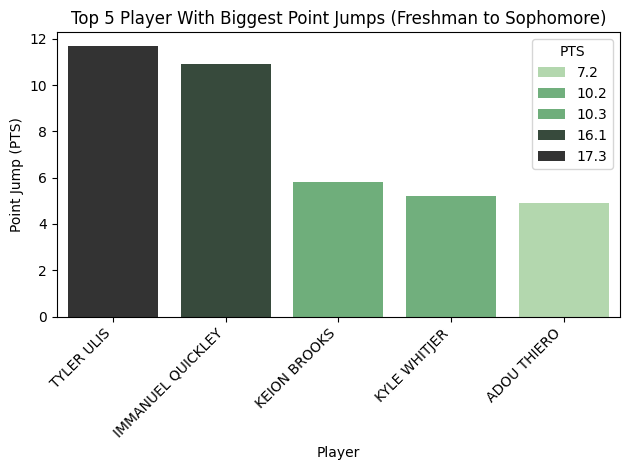

In [ ]:
#lets get a couple of other libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sort our DB by player and year
db_sort = db.sort_values(by=['Player', 'Year'])
#then get the difference between points from year to year and the difference
db_sort['Point_Jump'] = db_sort.groupby('Player')['PTS'].diff()
#drop any potential na jumps
db_jumps = db_sort.dropna(subset=['Point_Jump'])
#grab out biggest jumpers
biggest_jumps_points = db_jumps.sort_values(by='Point_Jump', ascending=False)
#and print out the markdown and view the data
print("Players with the biggest jump in points per game (Fresh to Soph):")
print(biggest_jumps_points[['Player', 'PTS', 'Point_Jump']].to_markdown(index=False, numalign='left', stralign='left'))
#then get the barplot going for the top 5
plt.figure()
sns.barplot(x='Player', y='Point_Jump', data=biggest_jumps_points.head(5), palette='Greens_d', hue='PTS')
plt.title('Top 5 Player With Biggest Point Jumps (Freshman to Sophomore)')
plt.xlabel('Player')
plt.ylabel('Point Jump (PTS)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


<h1> Tyler Ulis and Immanuel Quickley had massive point jumps after returning.

<h2> Alex Poythress averaged a full 5 points less, however.

<h2> Ulis being on Cal's staff at Arkansas is interesting now that Karter Knox is deciding to return or not. He could have the blueprint for the 'Sophomore Surge'.

Players with the biggest jump in Assists per game (Fresh to Soph):
| Player               | AST   | Assist_Jump   |
|:---------------------|:------|:--------------|
| TYLER ULIS           | 7     | 3.4           |
| ASHTON HAGANS        | 6.4   | 2.1           |
| KEION BROOKS         | 1.6   | 1.4           |
| KYLE WHITJER         | 1.5   | 1.1           |
| ISAIAH BRISCOE       | 4.2   | 1.1           |
| ADOU THIERO          | 1.1   | 0.7           |
| IMMANUEL QUICKLEY    | 1.9   | 0.7           |
| DAKARI JOHNSON       | 0.7   | 0.4           |
| PJ WASHINGTON        | 1.8   | 0.3           |
| DEREK WILLIS         | 0.3   | 0.3           |
| MARCUS LEE           | 0.3   | 0.2           |
| EJ MONTGOMERY        | 0.6   | 0.2           |
| UGONNA ONYENSO       | 0.2   | 0.1           |
| DAIMION COLLINS      | 0.2   | 0.1           |
| DONTAIE ALLEN        | 0.3   | 0             |
| WENYEN GABRIEL       | 0.6   | -0.1          |
| LANCE WARE           | 0.1   | -0.2          |
| 

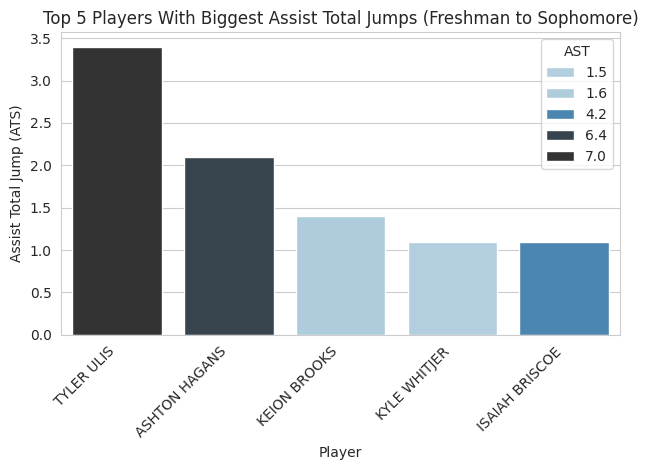

In [53]:
#now we'll do the same for assists

db_sort = db.sort_values(by=['Player', 'Year'])
db_sort['Assist_Jump'] = db_sort.groupby('Player')['AST'].diff()

db_jumps = db_sort.dropna(subset=['Assist_Jump'])

biggest_jumps_points = db_jumps.sort_values(by='Assist_Jump', ascending=False)

print("Players with the biggest jump in Assists per game (Fresh to Soph):")
print(biggest_jumps_points[['Player', 'AST', 'Assist_Jump']].to_markdown(index=False, numalign='left', stralign='left'))

plt.figure()
sns.barplot(x='Player', y='Assist_Jump', data=biggest_jumps_points.head(5), palette='Blues_d', hue='AST')
plt.title('Top 5 Players With Biggest Assist Total Jumps (Freshman to Sophomore)')
plt.xlabel('Player')
plt.ylabel('Assist Total Jump (ATS)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


<h1> Again, Ulis improved the most of any player under Cal at Kentucky in assists.

Players with the biggest jump in Rebounds per game (Fresh to Soph):
| Player               | TRB   | Rebound_Jump   |
|:---------------------|:------|:---------------|
| KEION BROOKS         | 6.8   | 3.6            |
| ADOU THIERO          | 5     | 3.1            |
| IMMANUEL QUICKLEY    | 4.2   | 2.4            |
| KYLE WHITJER         | 4.2   | 2.4            |
| UGONNA ONYENSO       | 4.8   | 2.2            |
| PJ WASHINGTON        | 7.5   | 1.8            |
| EJ MONTGOMERY        | 5.4   | 1.3            |
| MARCUS LEE           | 2.7   | 1.3            |
| ASHTON HAGANS        | 3.9   | 1.3            |
| TYLER ULIS           | 3     | 1.2            |
| DAKARI JOHNSON       | 4.6   | 0.7            |
| WENYEN GABRIEL       | 5.4   | 0.6            |
| ISAIAH BRISCOE       | 5.4   | 0.1            |
| DEREK WILLIS         | 0.7   | 0.1            |
| DAIMION COLLINS      | 1.9   | -0.1           |
| WILLIE CAULEY STIEIN | 6.1   | -0.1           |
| AARON HARRISON       | 2.6   |

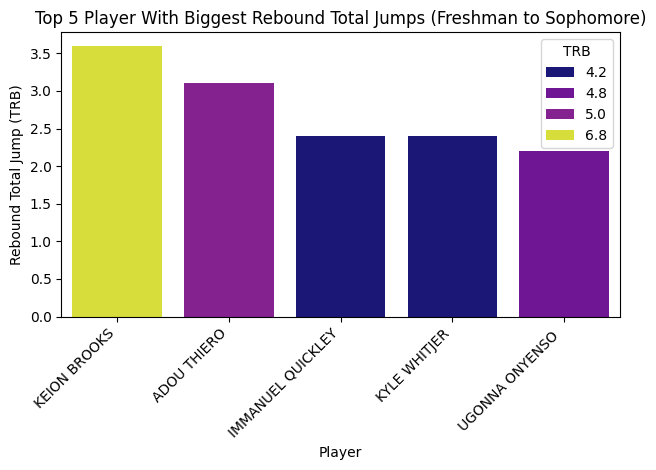

In [ ]:
#and rebounds
db_sort = db.sort_values(by=['Player', 'Year'])
db_sort['Rebound_Jump'] = db_sort.groupby('Player')['TRB'].diff()

db_jumps = db_sort.dropna(subset=['Rebound_Jump'])

biggest_jumps_points = db_jumps.sort_values(by='Rebound_Jump', ascending=False)

print("Players with the biggest jump in Rebounds per game (Fresh to Soph):")
print(biggest_jumps_points[['Player', 'TRB', 'Rebound_Jump']].to_markdown(index=False, numalign='left', stralign='left'))

plt.figure()
sns.barplot(x='Player', y='Rebound_Jump', data=biggest_jumps_points.head(5), palette='plasma', hue='TRB')
plt.title('Top 5 Player With Biggest Rebound Total Jumps (Freshman to Sophomore)')
plt.xlabel('Player')
plt.ylabel('Rebound Total Jump (TRB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<h1> Keion Brooks and Adou Thiero both had impressive rebound jumps of over 3 per game.

Players with the biggest jump in eFG per game (Fresh to Soph):
| Player               | eFG%   | eFG_Jump   |
|:---------------------|:-------|:-----------|
| KEION BROOKS         | 0.462  | 3.6        |
| ADOU THIERO          | 0.519  | 3.1        |
| IMMANUEL QUICKLEY    | 0.511  | 2.4        |
| KYLE WHITJER         | 0.52   | 2.4        |
| UGONNA ONYENSO       | 0.55   | 2.2        |
| PJ WASHINGTON        | 0.567  | 1.8        |
| EJ MONTGOMERY        | 0.522  | 1.3        |
| MARCUS LEE           | 0.644  | 1.3        |
| ASHTON HAGANS        | 0.434  | 1.3        |
| TYLER ULIS           | 0.497  | 1.2        |
| DAKARI JOHNSON       | 0.506  | 0.7        |
| WENYEN GABRIEL       | 0.548  | 0.6        |
| ISAIAH BRISCOE       | 0.494  | 0.1        |
| DEREK WILLIS         | 0.528  | 0.1        |
| DAIMION COLLINS      | 0.425  | -0.1       |
| WILLIE CAULEY STIEIN | 0.596  | -0.1       |
| AARON HARRISON       | 0.474  | -0.4       |
| DONTAIE ALLEN        | 0.363  | -0.4      

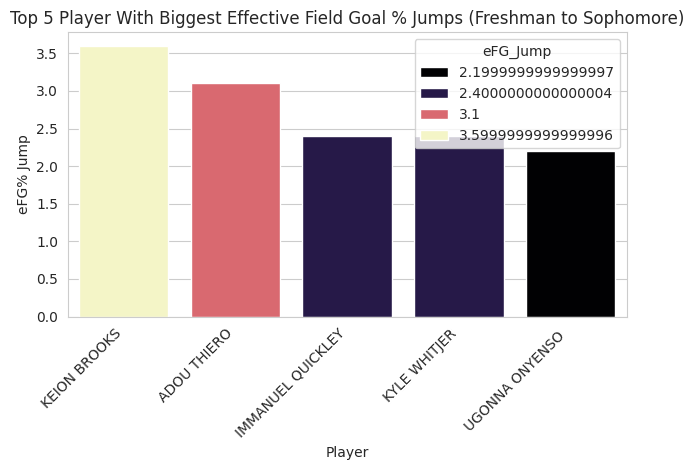

In [56]:
#and eFG%
db_sort = db.sort_values(by=['Player', 'Year'])
db_sort['eFG_Jump'] = db_sort.groupby('Player')['TRB'].diff()

db_jumps = db_sort.dropna(subset=['eFG_Jump'])

biggest_jumps_points = db_jumps.sort_values(by='eFG_Jump', ascending=False)

print("Players with the biggest jump in eFG per game (Fresh to Soph):")
print(biggest_jumps_points[['Player', 'eFG%', 'eFG_Jump']].to_markdown(index=False, numalign='left', stralign='left'))

plt.figure()
sns.barplot(x='Player', y='eFG_Jump', data=biggest_jumps_points.head(5), palette='magma', hue='eFG_Jump')
plt.title('Top 5 Player With Biggest Effective Field Goal % Jumps (Freshman to Sophomore)')
plt.xlabel('Player')
plt.ylabel('eFG% Jump')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<h1> When we look at effective field goal percentage, though, Ulis had a paltry 1.2% increase, even though his point totals and assist totals jumped more than any other player under Cal from Freshman to Sophomore.

<h2>First, let's remember what eFG% means:
eFG% = (Field Goals Made + 0.5 * 3-Pointers Made) / Field Goal Attempts

<h3>It's a more accurate shooting efficiency metric than traditional field goal percentage because it gives 1.5 times the credit for a made 3-pointer compared to a 2-pointer.

<h1> Analysis hypotheses:
<h2>
1. Increased shot volume with similar efficiency from year one to year two.
<h2>
2. He made a lot more free throws.
<h2>
3. His role expanded significantly, through minutes played, and total shots taken.

In [ ]:
#gonna grab just ulis' stats
ulis_stats = db[db['Player'] == 'TYLER ULIS']
#choose which stats we want to show
columns_to_show = ['Year', 'MP', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'PTS', 'eFG%']
#then combine them
ulis_spec_stats = ulis_stats[columns_to_show]

print("Tyler Ulis Stats:")
print(ulis_spec_stats.to_markdown(index=False, numalign='left', stralign='left'))

Tyler Ulis Stats:
| Year   | MP   | 2P   | 2PA   | 3P   | 3PA   | FT   | FTA   | PTS   | eFG%   |
|:-------|:-----|:-----|:------|:-----|:------|:-----|:------|:------|:-------|
| 0      | 23.8 | 0.9  | 2.4   | 0.9  | 2.1   | 1.1  | 1.4   | 5.6   | 0.506  |
| 1      | 36.8 | 3.9  | 8.1   | 1.6  | 4.6   | 4.8  | 5.6   | 17.3  | 0.497  |


Why Ulis' eFG% remained similar despite big jumps in points and assists:

The data confirms our earlier hypotheses:

1. Massive Increase in Shot Volume: Ulis took many more 2-point and 3-point attempts. Even if his percentage on these shots didn't drastically improve, the sheer volume led to many more made field goals and thus more points.

2. Significant Increase in Free Throws: He dramatically increased his trips to the free-throw line and converted a higher volume of free throws (4.8 made vs. 1.1). Free throws contribute to total points but are not included in the eFG% calculation. This is a primary reason his points surged while his eFG% didn't.

3. Slight Dip in eFG%: Interestingly, his eFG% actually decreased slightly from 0.506 to 0.497. This means that while he was scoring more overall, his efficiency per shot attempt from the field was slightly lower in Year 1. This could be due to taking more difficult shots with increased usage, facing tougher defense, or a minor decline in shooting touch that was masked by the increased volume.

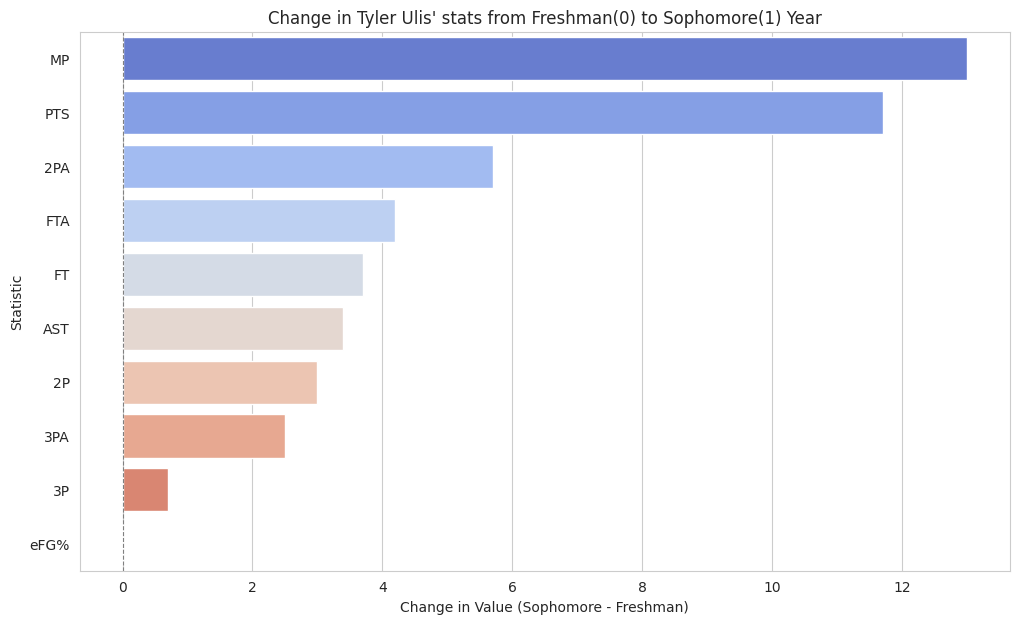

In [ ]:
#let's calculate the difference for each stat
#lets use year 0 as first row and year 1 for 2nd
ulis_year0 = ulis_stats[ulis_stats['Year'] == 0].iloc[0]
ulis_year1 = ulis_stats[ulis_stats['Year']== 1].iloc[0]

#these are the columns I want from my dataset
stats_to_analyze = ['MP', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'PTS', 'AST', 'eFG%']

#here's where we iterate and grab every change
stat_changes = {}
for stat in stats_to_analyze:
  stat_changes[stat] = ulis_year1[stat] - ulis_year0[stat]
#convert dictionary into dataframe for plotting
db_changes = pd.DataFrame(list(stat_changes.items()), columns= ['Statistic', 'Change'])
#sort changes to make plot more readable
db_changes = db_changes.sort_values(by='Change', ascending=False)
#set a style for the seaborn plot
sns.set_style("whitegrid")
#and create the bar plot over the changes
plt.figure(figsize=(12,7))
sns.barplot(x='Change',
            y='Statistic',
            data=db_changes,
            palette='coolwarm',
            hue='Statistic')
plt.title("Change in Tyler Ulis' stats from Freshman(0) to Sophomore(1) Year")
plt.xlabel('Change in Value (Sophomore - Freshman)')
plt.ylabel('Statistic')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8);


<h1> In conclusion, Cal hasn't exactly had a ton of returning freshmen that contributed heavily at Kentucky.

<h1> 22 exactly. On average, I believe we used what data there is to imply that they usually have better seasons when they return.

<h2> Considering Tyler Ulis - Cal's greatest, statistically speaking, returning Freshman in his Kentucky tenure - is now on his staff at Arkansas with a potential Karter Knox return looming, could Ulis have the recipe for yet another huge Sophomore season for Knox?

